In [18]:
import matplotlib.pyplot as plt
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile

df = pd.read_excel('/home/avi/Desktop/Metabolic_Prediction/GTEx_pancreas_liver_images_liverfat_pancreasfat.xlsx')

In [19]:
df['Sex'] = df['Sex'].map({'female': 1, 'male': 0})

In [20]:
df['Age.Bracket']= df['Age.Bracket'].astype(str) 

In [21]:
df['Age.Bracket'] = df['Age.Bracket'].map({'0-9': 1,'10-19': 2,'20-29': 3,'30-39': 4,'40-49': 5,'50-59': 6,'60-69': 7,'70-79': 8,'80-89': 9,'90-99': 10})

# Computing Biserial Correlation between Sex and Liver fat Content

In [22]:
import math
n0, n1= df['Sex'].value_counts() 
m0, m1 = 0,1
n,y= df.shape
k = df['Fat.Percentage_liver'].std()

t= math.sqrt((n0*n1)/(n*n))

r = ((m1 - m0)*t)/k
print(r)


0.03869794298569949


# Computing Biserial Correlation between Sex and Pancreas fat Content

In [23]:
k = df['Fat.Percentage_pancreas'].std()
t= math.sqrt((n0*n1)/(n*n))

r = ((m1 - m0)*t)/k
print(r)

0.026075425921971342


# Finding correlation between liver fat percentage and pancreas fat content

In [24]:
data = df[['Fat.Percentage_liver','Fat.Percentage_pancreas']]
correlation = data.corr(method='pearson')
print(correlation)

                         Fat.Percentage_liver  Fat.Percentage_pancreas
Fat.Percentage_liver                 1.000000                 0.094609
Fat.Percentage_pancreas              0.094609                 1.000000


# Finding correlation between age group and liver fat percentage. Although this technique is practically not much revealing

In [25]:
data = df[['Age.Bracket','Fat.Percentage_liver']]
correlation = data.corr(method='pearson')
print(correlation)

                      Age.Bracket  Fat.Percentage_liver
Age.Bracket               1.00000               0.01717
Fat.Percentage_liver      0.01717               1.00000


# Finding correlation between age group and liver fat percentage. Although this technique is practically not much revealing

In [26]:
data = df[['Age.Bracket','Fat.Percentage_pancreas']]
correlation = data.corr(method='pearson')
print(correlation)

                         Age.Bracket  Fat.Percentage_pancreas
Age.Bracket                 1.000000                 0.166649
Fat.Percentage_pancreas     0.166649                 1.000000


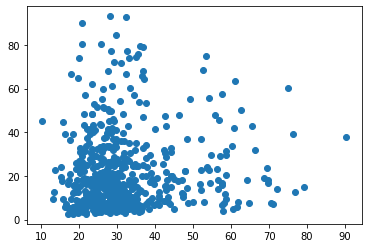

In [27]:
plt.scatter(df['Fat.Percentage_liver'], df['Fat.Percentage_pancreas'])
plt.show()

# Calculating score values for liver disease categories

In [28]:
s = df["Pathology.Categories_liver"] 
l = s.to_list()
my_dict = {".": 0, "nan": 0, "no_abnormalities": 0, "necrosis": 1, "congestion": 1, "fibrosis": 1, "inflammation": 1, "steatosis": 1, "cirrhosis": 1,
           "hyperplasia": 1, "nodularity": 1, "hemorrhage": 1, "atrophy": 1, "infarction": 1, "hepatitis": 1,
          "sclerotic": 1, "scarring": 1, "hyalinization": 1, "pigment": 1, "ischemic_changes": 1, "clean_specimens": 0}

score_list=[]
for i in l: 
    score=0
    i = str(i)
    my_list = i.split(",") 
    for i in my_list:
        score = score + my_dict[i.strip()]
    score_list.append(score)
    
df.loc[:,'Score_List_Liver'] = score_list

# Computing correlation between liver disease category scores and liver fat content

In [29]:
data = df[['Score_List_Liver','Fat.Percentage_liver']]
correlation = data.corr(method='pearson')
print(correlation)

                      Score_List_Liver  Fat.Percentage_liver
Score_List_Liver              1.000000              0.194163
Fat.Percentage_liver          0.194163              1.000000


# Calculating score values for pancreas disease categories

In [30]:
s = df["Pathology.Categories_pancreas"] 
l = s.to_list()
my_dict = {".": 0, "nan": 0, "no_abnormalities": 0, "saponification": 1, "atrophy": 1, "fibrosis": 1, "diabetic": 1, "sclerotic": 1, "pancreatitis": 1,
          "cyst": 1, "metaplasia": 1, "congestion": 1, "hemorrhage": 1, "calcification": 1, "necrosis": 1, "inflammation": 1, "desquamation": 1,
          "nodularity": 1, "scarring": 1, "clean_specimens": 0}
score_list=[]
for i in l: 
    score=0
    i = str(i)
    my_list = i.split(",") 
    for i in my_list:
        score = score + my_dict[i.strip()]
    score_list.append(score)
    
df.loc[:,'Score_List_Pancreas'] = score_list

# Computing correlation between pancreas disease category scores and pancreas fat content

In [31]:
data = df[['Score_List_Pancreas','Fat.Percentage_pancreas']]
correlation = data.corr(method='pearson')
print(correlation)

                         Score_List_Pancreas  Fat.Percentage_pancreas
Score_List_Pancreas                   1.0000                   0.0633
Fat.Percentage_pancreas               0.0633                   1.0000


# Implementing multiple linear regression for liver fat content

In [32]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
import sklearn
from sklearn import linear_model
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.linear_model import RidgeCV
%matplotlib inline

In [33]:
# defining feature matrix(X) and response vector(y) 
X = df[['Sex','Age.Bracket','Score_List_Liver']]
y = df[['Fat.Percentage_liver']]

# splitting X and y into training and testing sets 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) 
  
# create linear regression object 
reg = linear_model.LinearRegression() 

reg = RidgeCV(alphas=[1, 1e3, 1e6], store_cv_values=True)
  
# train the model using the training sets 
reg.fit(X_train, y_train) 

pred = reg.predict(X_test)
  
# regression coefficients 
print('Coefficients: \n', reg.coef_) 
  
# variance score: 1 means perfect prediction 
print('Variance score: {}'.format(reg.score(X_test, y_test))) 

# The mean squared error
print("Mean squared error: %.2f" % np.mean((reg.predict(X_test) - y_test) ** 2))

  

Coefficients: 
 [[0.0270624  0.05291611 2.82771939]]
Variance score: 0.007375557355730811
Mean squared error: 137.08


# Implementing multiple linear regression for pancreas fat content

In [34]:
# defining feature matrix(X) and response vector(y) 
X = df[['Sex','Age.Bracket','Score_List_Pancreas']]
y = df[['Fat.Percentage_pancreas']]

# splitting X and y into training and testing sets 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) 
  
# create linear regression object 
reg = linear_model.LinearRegression() 

reg = RidgeCV(alphas=[1, 1e3, 1e6], store_cv_values=True)
  
# train the model using the training sets 
reg.fit(X_train, y_train) 

pred = reg.predict(X_test)
  
# regression coefficients 
print('Coefficients: \n', reg.coef_) 
  
# variance score: 1 means perfect prediction 
print('Variance score: {}'.format(reg.score(X_test, y_test))) 

# The mean squared error
print("Mean squared error: %.2f" % np.mean((reg.predict(X_test) - y_test) ** 2))

  

Coefficients: 
 [[-1.11836728  2.5470895   1.12494484]]
Variance score: 0.03359989166840138
Mean squared error: 257.01
